# Community Analysis and Visualization of Cluster Data

This notebook performs community analysis and visualization of cluster data progression

## Key Steps

1. Loads required libraries including pandas, networkx, plotly and matplotlib
2. Sets up environment variables and paths for data/output directories
3. Reads graph data from graphml file containing community structure
4. Loads analysis dataframe with cluster assignments
5. Processes cluster labels and qualifications data
6. Creates visualizations of:
   - Community proportions and trends
   - Cluster relationships and structure
   - Distribution of qualifications across clusters

The notebook uses custom plotting classesto generate standardized visualizations of the community analysis results.


In [3]:
%load_ext autoreload
%autoreload 2
import json
import pandas as pd
import networkx as nx
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# remove the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

from dotenv import load_dotenv
import os
# Load environment variables from .env file
load_dotenv()

# Access environment variables
python_path = os.getenv('PYTHONPATH')
data_dir = os.getenv('DATA_DIR')
src_dir = os.getenv('SRC_DIR')
output_dir = os.getenv('OUTPUT_DIR')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pg = data_dir + "/08-analysis-data/graph_analysis.graphml"
G = nx.read_graphml(pg)
pdf = data_dir + "/08-analysis-data/df_analysis.pkl"
df = pd.read_pickle(pdf)

In [5]:
# open the cluster label file

with open(
    output_dir
    + "/cluster-qualifications/cluster-label-tree/cluster_labels_filtered.json",
    "r",
) as f:
    cluster_label_dict = json.load(f)


# read in legend
legend_p = (
    output_dir + "/cluster-qualifications/cluster-label-tree/legend_labels_2025.json"
)
with open(legend_p, "r") as f:
    legend = json.load(f)

In [6]:
legend

{'Pharmacology': {'Pharmacodynamics': {'Mechanism of action': [{'1': 'Serotonin Receptor Modulation in SSRI Treatment'},
    {'7': 'Impact of SSRIs on Neurogenesis'},
    {'9': 'SSRIs Effect on Neural Processing of Emotional Cues'},
    {'53': 'Neuroimaging of Serotonin Transporters'},
    {'60': 'SSRIs Effects on Ion Channels'},
    {'63': 'Methylenedioxymethamphetamine (MDMA) Induced Neurotoxicity'},
    {'68': 'SSRIs Effect on Pulmonary Hypertension'},
    {'73': 'Non-SERT Transporters in Antidepressant Action'},
    {'76': 'SERT Binding Mechanisms'},
    {'77': 'Astrocyte Receptors as a Target for SSRIs'},
    {'84': 'SSRIs Effect on Dopamine Receptors'},
    {'85': 'SSRIs Effects on Antimicrobials and Gut Microbiome'},
    {'88': 'Neurometabolite Changes with Antidepressants'},
    {'89': 'Galanin System in Antidepressant Action'},
    {'92': 'SSRIs Effect on Brain-derived Neurotrophic Factor (BDNF) Levels in Depressive Patients'}],
   'Animal Models of Disorders': [{'8': 'The Chr

## get some specific clusters from the legend


In [7]:
def get_all_leaf_clusters(node, print_labels=False):
    """
    Recursively extracts all leaf cluster numbers from a hierarchical tree structure.

    Args:
        node: A dictionary or list node in the hierarchical tree

    Returns:
        list: A sorted list of all unique cluster numbers found in the leaves
    """
    clusters = []

    if isinstance(node, dict):
        # If this is a dictionary node, process each of its values
        for value in node.values():
            clusters.extend(get_all_leaf_clusters(value))

    elif isinstance(node, list):
        # If this is a list node, process each item in the list
        for item in node:
            clusters.extend(get_all_leaf_clusters(item))

    elif isinstance(node, dict) and len(node) == 1:
        # This is a leaf node with a single key-value pair
        # The key is the cluster number and the value is the description
        clusters.append(int(list(node.keys())[0]))

    # Handle the case where node is a dictionary with a single numeric key
    # This is the actual leaf node format in your data
    if (
        isinstance(node, dict)
        and len(node) == 1
        and all(k.isdigit() for k in node.keys())
    ):
        clusters.append(int(list(node.keys())[0]))

    if print_labels:
        for cluster in clusters:
            print(
                f"Cluster {cluster}: {cluster_label_dict.get(str(cluster), 'Unknown')}"
            )

    return sorted(list(set(clusters)))

Get geriatric clusters


In [8]:
print("Geriatrics Clusters:")
# Get all leaf clusters under the "Geriatrics" node in the legend
geriatrics_keys = get_all_leaf_clusters(
    legend["Safety"]["Special Populations"]["Geriatrics"], print_labels=True
)

Geriatrics Clusters:
Cluster 18: Post-Stroke SSRI Use
Cluster 23: SSRIs for Depression in Patients with Cardiovascular Disease
Cluster 24: SSRIs in Dementias
Cluster 47: SSRIs for Depression with Cognitive Impairment
Cluster 58: SSRIs for Depression in Parkinsons Patients
Cluster 75: SSRIs for Geriatric Depression


Perinatal Exposure


In [9]:
print("Perinatal Exposure Clusters:")
# Get all leaf clusters under the "Perinatal Exposure" node in the legend
perinatal_exposure_keys = get_all_leaf_clusters(
    legend["Safety"]["Perinatal Exposure"], print_labels=True
)

Perinatal Exposure Clusters:
Cluster 4: Risk of Prenatal Exposure
Cluster 10: Risk of Prenatal Exposure (Rodents)
Cluster 42: SSRI Effects on Lactation
Cluster 95: SSRIs for Postpartum Depression


Animal Models of Disorder


In [10]:
print("Animal Models of Disorders Clusters:")
# Get all leaf clusters under the "Animal Models of Disorders" node in the legend
animal_models_keys = get_all_leaf_clusters(
    legend["Pharmacology"]["Pharmacodynamics"]["Animal Models of Disorders"],
    print_labels=True,
)

Animal Models of Disorders Clusters:
Cluster 8: The Chronic Unpredictable Mild Stress Model of Depression
Cluster 12: SSRIs in Forced Swimming Test
Cluster 17: SSRIs Effect on Fear
Cluster 71: Serotonergic Modulation of Cocaine Effects


# VISUALS


# Interactive visualization


In [11]:
from src.network.analysis.InteractiveProportionsPlotter import (
    InteractiveProportionsPlotter,
)

In [12]:
# Create plotter
plotter = InteractiveProportionsPlotter(
    df=df,
    cluster_label_dict=cluster_label_dict,
    year_col="year",
    cluster_col="cluster_alpha0.3_k10_res0.002",
    output_dir=output_dir + "/figures/",
)

# Plot with all clusters, normalized by total
fig_total = plotter.plot_proportions(
    cluster_subset_list=df["cluster_alpha0.3_k10_res0.002"].unique().tolist(),
    figsize=(15, 8),
    proportions_total="total",
    save=True,
    filename="cluster_trends_total.html",
    title="Distribution of Research Topics Over Time",
)


# Plot with subset of clusters, normalized by subset
fig_geriatrics = plotter.plot_proportions(
    cluster_subset_list=geriatrics_keys,  # Only ML and CV
    figsize=(12, 6),
    proportions_total="total",
    save=True,
    filename="cluster_trends_geriatrics.html",
    color_palette=["#1f77b4", "#ff7f0e"],  # Custom colors
)


# Plot with subset of clusters, normalized by subset
fig_animal = plotter.plot_proportions(
    cluster_subset_list=animal_models_keys,  # Only ML and CV
    figsize=(12, 6),
    proportions_total="subset",
    save=True,
    filename="cluster_trends_animal.html",
    color_palette=["#1f77b4", "#ff7f0e"],  # Custom colors
)

# Plot with subset of clusters, normalized by subset
fig_perinatal = plotter.plot_proportions(
    cluster_subset_list=perinatal_exposure_keys,  # Only ML and CV
    figsize=(12, 6),
    proportions_total="subset",
    save=True,
    filename="cluster_trends_perinatal.html",
    color_palette=["#1f77b4", "#ff7f0e"],  # Custom colors
)

# Plot all clusters


In [13]:
fig_total

# Plot Geriatrics


In [14]:
fig_geriatrics

# Animal Models Plot


In [15]:
fig_animal

# Perinatal Exposure


In [16]:
fig_perinatal

#### main path keys:


In [17]:
file = output_dir + "/descriptive-stats-logs/main_path_cluster_occurence.json"

with open(file, "r") as f:
    cluster_occurence_dict = json.load(f)

mp_keys_all = list(cluster_occurence_dict.keys())

cluster_occurence_dict_min3 = {
    k: v for k, v in cluster_occurence_dict.items() if int(v) > 2
}

mp_keys_sub = list(cluster_occurence_dict_min3.keys())
print(mp_keys_sub)

['19', '27', '14', '6', '39', '7', '10', '0', '38']


In [18]:
# Create plotter
plotter = InteractiveProportionsPlotter(
    df=df,
    cluster_label_dict=cluster_label_dict,
    year_col="year",
    cluster_col="cluster_alpha0.3_k10_res0.002",
    output_dir=output_dir + "/figures/",
)

In [ ]:
# Plot with subset of clusters, normalized by subset

mp_subset = plotter.plot_proportions(
    cluster_subset_list=mp_keys_sub,
    figsize=(12, 6),
    title="Main Path Clusters Progression (Relative to All Selected Clusters)",
    # sort_clusters=True,
    show_buttons=True,
    proportions_total="subset",
    save=True,
    filename="../paper-output/mainpath_interactive_clusterprogression.html",
    color_palette=["#1f77b4", "#ff7f0e"],  # Custom colors
)

mp_subset

In [ ]:
mp_subset_static = plotter.plot_proportions(
    cluster_subset_list=mp_keys_sub,
    figsize=(12, 6),
    # title="Main Path Clusters Progression (Relative to All Selected Clusters)",
    title="",
    # sort_clusters=True,
    show_buttons=False,
    proportions_total="subset",
    save=False,
    filename="../paper-output/mainpath_static_clusterprogression.html",
    color_palette=["#1f77b4", "#ff7f0e"],  # Custom colors
)
plotter.save_figure_as_png(
    mp_subset_static,
    output_dir + "/paper-output/mainpath_topic_clusterprogression.png",
    width=1500,
    height=900,
    dpi=500,
)

# Screenshot Figure


In [ ]:
"/Users/jlq293/Projects/PhD project/02 Project/Study 1/BibliometricAnalysis/report/manuscripts/figs/figure3a_prenatal1982to2010.png"

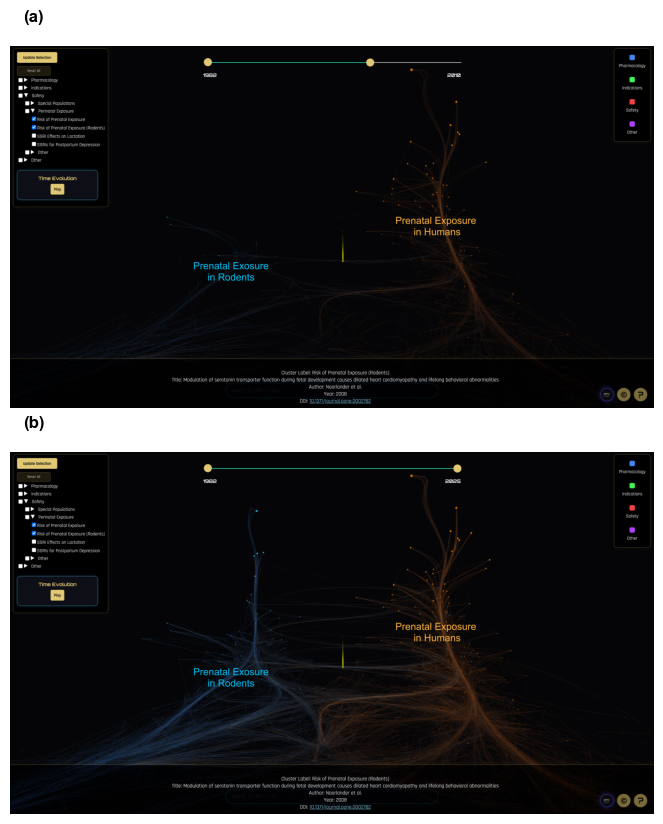

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Set font to Arial
plt.rcParams["font.family"] = "Arial"

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11.69, 8.27))  # A4 horizontal dimensions
img1 = Image.open(
    python_path + "/report/manuscripts/figs/notIncl/figure4a_prenatal1982to2010.png"
)
img2 = Image.open(
    python_path + "/report/manuscripts/figs/notIncl/figure4b_prenatal1982to2025.png"
)

ax1.imshow(img1)
ax1.text(
    0.02,
    1.1,
    "(a)",
    fontsize=12,
    fontweight="bold",
    transform=ax1.transAxes,
    verticalalignment="top",
    horizontalalignment="left",
)
ax1.axis("off")

ax2.imshow(img2)
ax2.text(
    0.02,
    1.1,
    "(b)",
    fontsize=12,
    fontweight="bold",
    transform=ax2.transAxes,
    verticalalignment="top",
    horizontalalignment="left",
)
ax2.axis("off")

plt.tight_layout()
plt.savefig(
    python_path + "/report/manuscripts/figs/figure4ab_prenatal_comb.png",
    dpi=400,
    bbox_inches="tight",
)